In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.ticker as mticker
%matplotlib inline


# Preprocesamiento de radianza Monterrey

In [2]:
data = pd.read_csv("../data_municipios/municipios_completos.csv")
data["Fecha"] = pd.to_datetime(data["Fecha"])
mont = data[data["Municipio"] == "monterrey"]
mont.head()

Fecha  Municipio  Cantidad_de_pixeles  Suma_de_radianza  \
336144 2012-01-19  monterrey                  944          373556.0   
336145 2012-01-20  monterrey                  944          362033.0   
336146 2012-01-21  monterrey                  944          481412.0   
336147 2012-01-22  monterrey                  944          543319.0   
336148 2012-01-23  monterrey                  944          158478.0   

        Media_de_radianza  Desviacion_estandar_de_radianza  \
336144         395.716102                       198.390563   
336145         383.509534                       177.839208   
336146         509.970339                       239.903408   
336147         575.549788                       277.077984   
336148         167.879237                        52.857943   

        Maximo_de_radianza  Minimo_de_radianza  Percentil_25_de_radianza  \
336144              1493.0                13.0                    270.75   
336145               926.0                32.0                    304.00   
336146              1166.0                13.0                    361.00   
336147              1665.0                 8.0                    426.00   
336148               318.0                35.0                    131.00   

        Percentil_50_de_radianza  Percentil_75_de_radianza  
336144                     399.0                    518.00  
336145                     396.0                    482.25  
336146                     532.0                    671.50  
336147                     609.5                    748.50  
336148                     168.0                    207.00

<Figure size 1200x800 with 0 Axes>

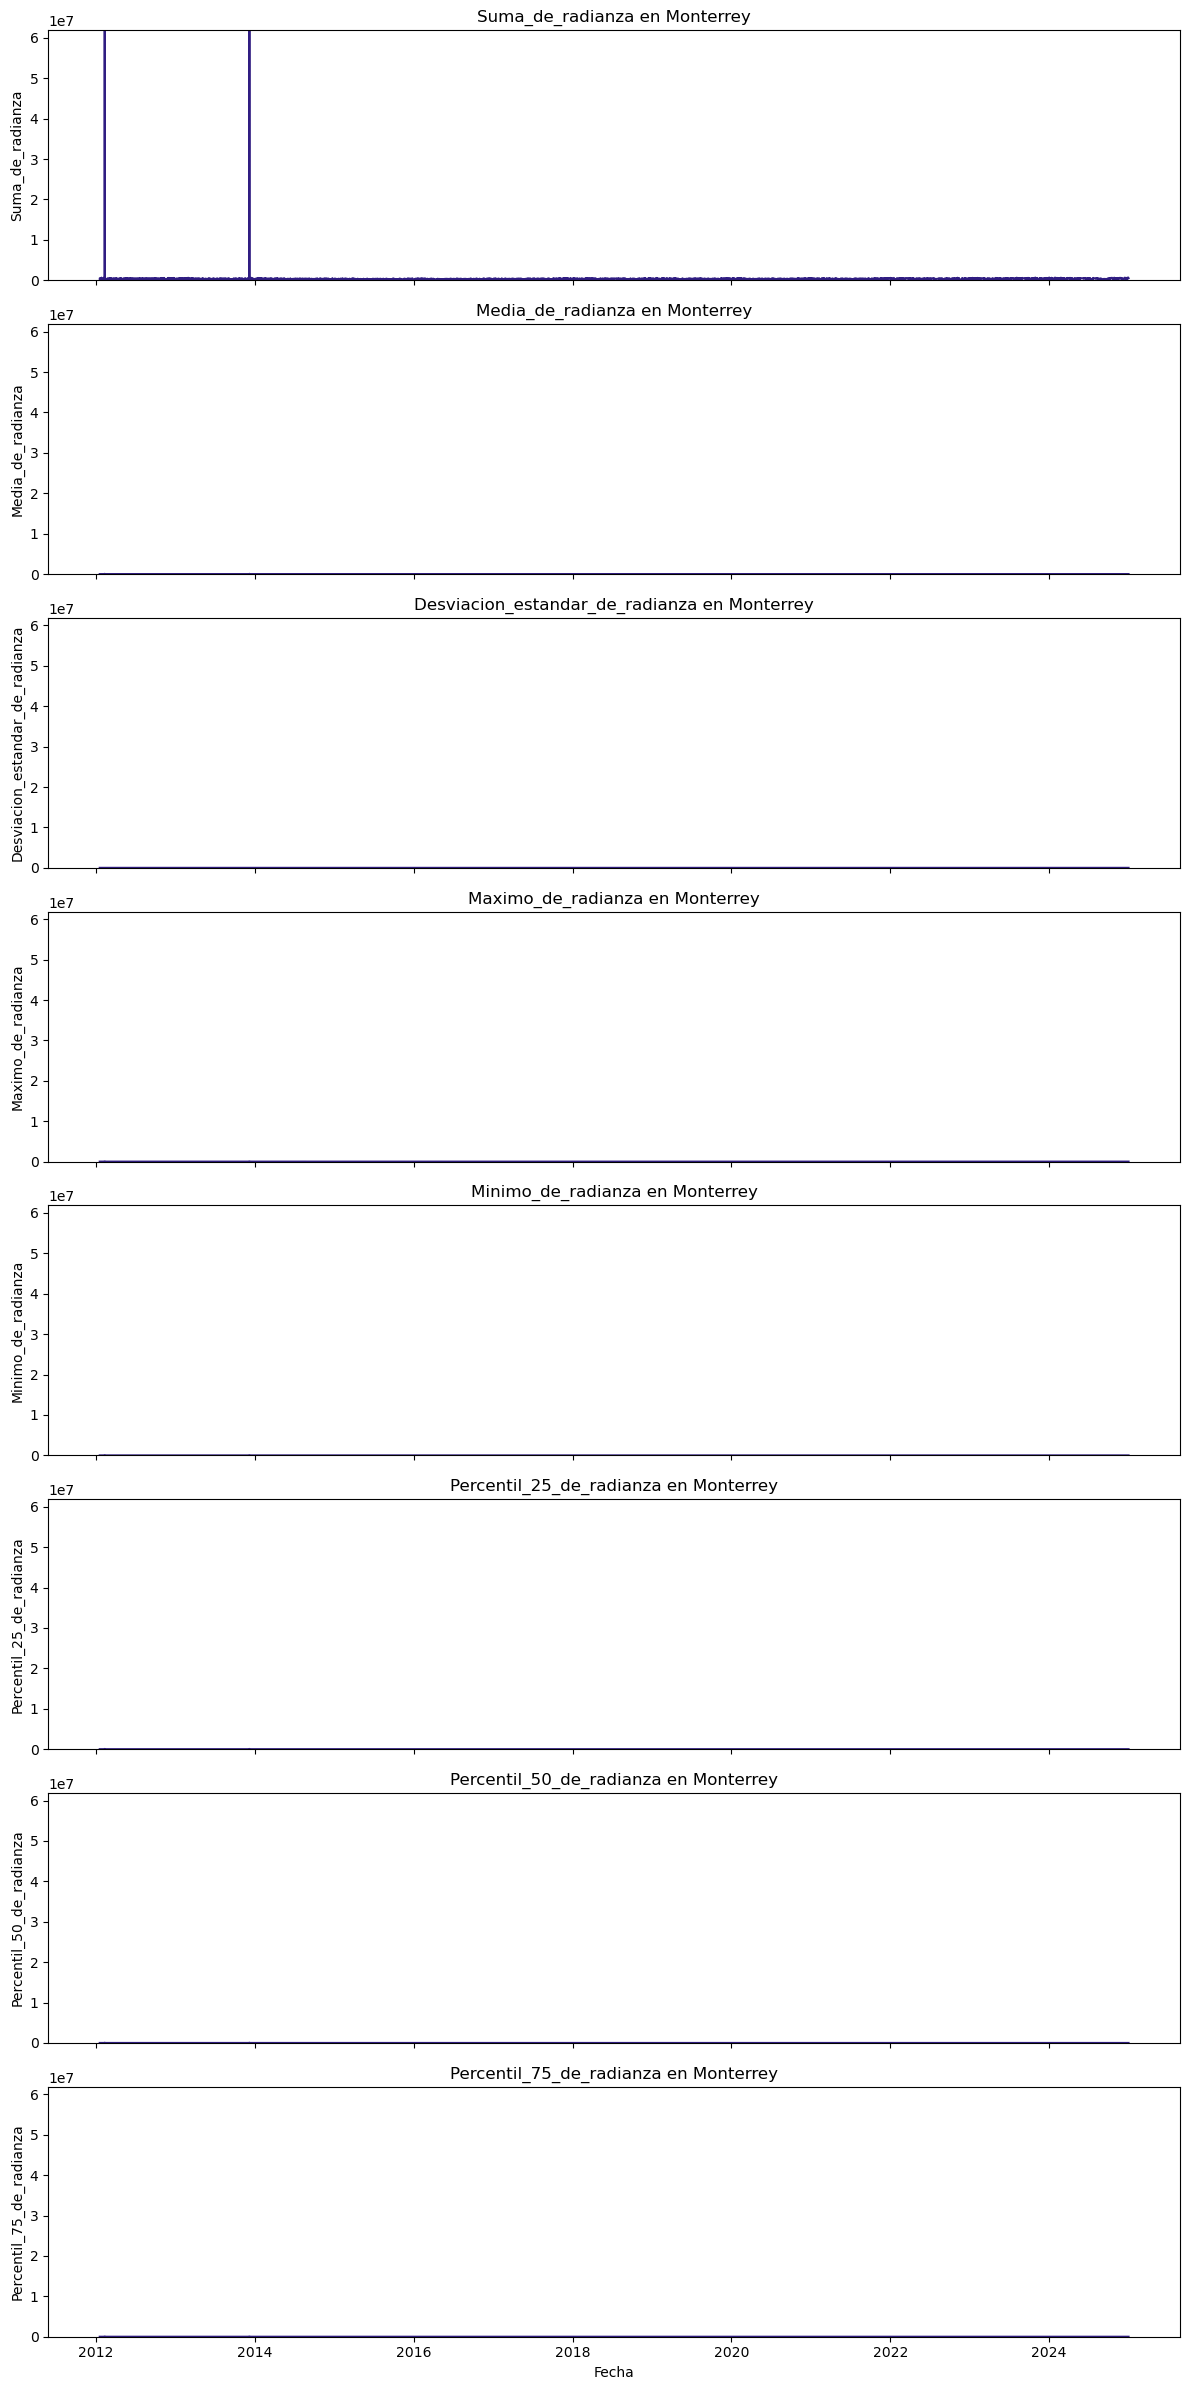

In [3]:
plt.figure(figsize=(12, 8))
medidas = mont.iloc[:, 3:].columns

y_min = np.inf
y_max = -np.inf
for medida in medidas:
    col_min = mont[medida].min()
    col_max = mont[medida].max()
    if col_min < y_min:
        y_min = col_min
    if col_max > y_max:
        y_max = col_max

y_max += 1e3

fig, axes = plt.subplots(len(medidas), 1, figsize=(12, 3 * len(medidas)), sharex=True)
if len(medidas) == 1:
    axes = [axes]
for i, medida in enumerate(medidas):
    sns.lineplot(ax=axes[i], data=mont, x="Fecha", y=medida, color="#301D82")
    axes[i].set_title(f"{medida} en Monterrey")
    axes[i].set_xlabel("Fecha")
    axes[i].set_ylabel(medida)
    axes[i].set_ylim([y_min, y_max])
plt.tight_layout()
plt.show()

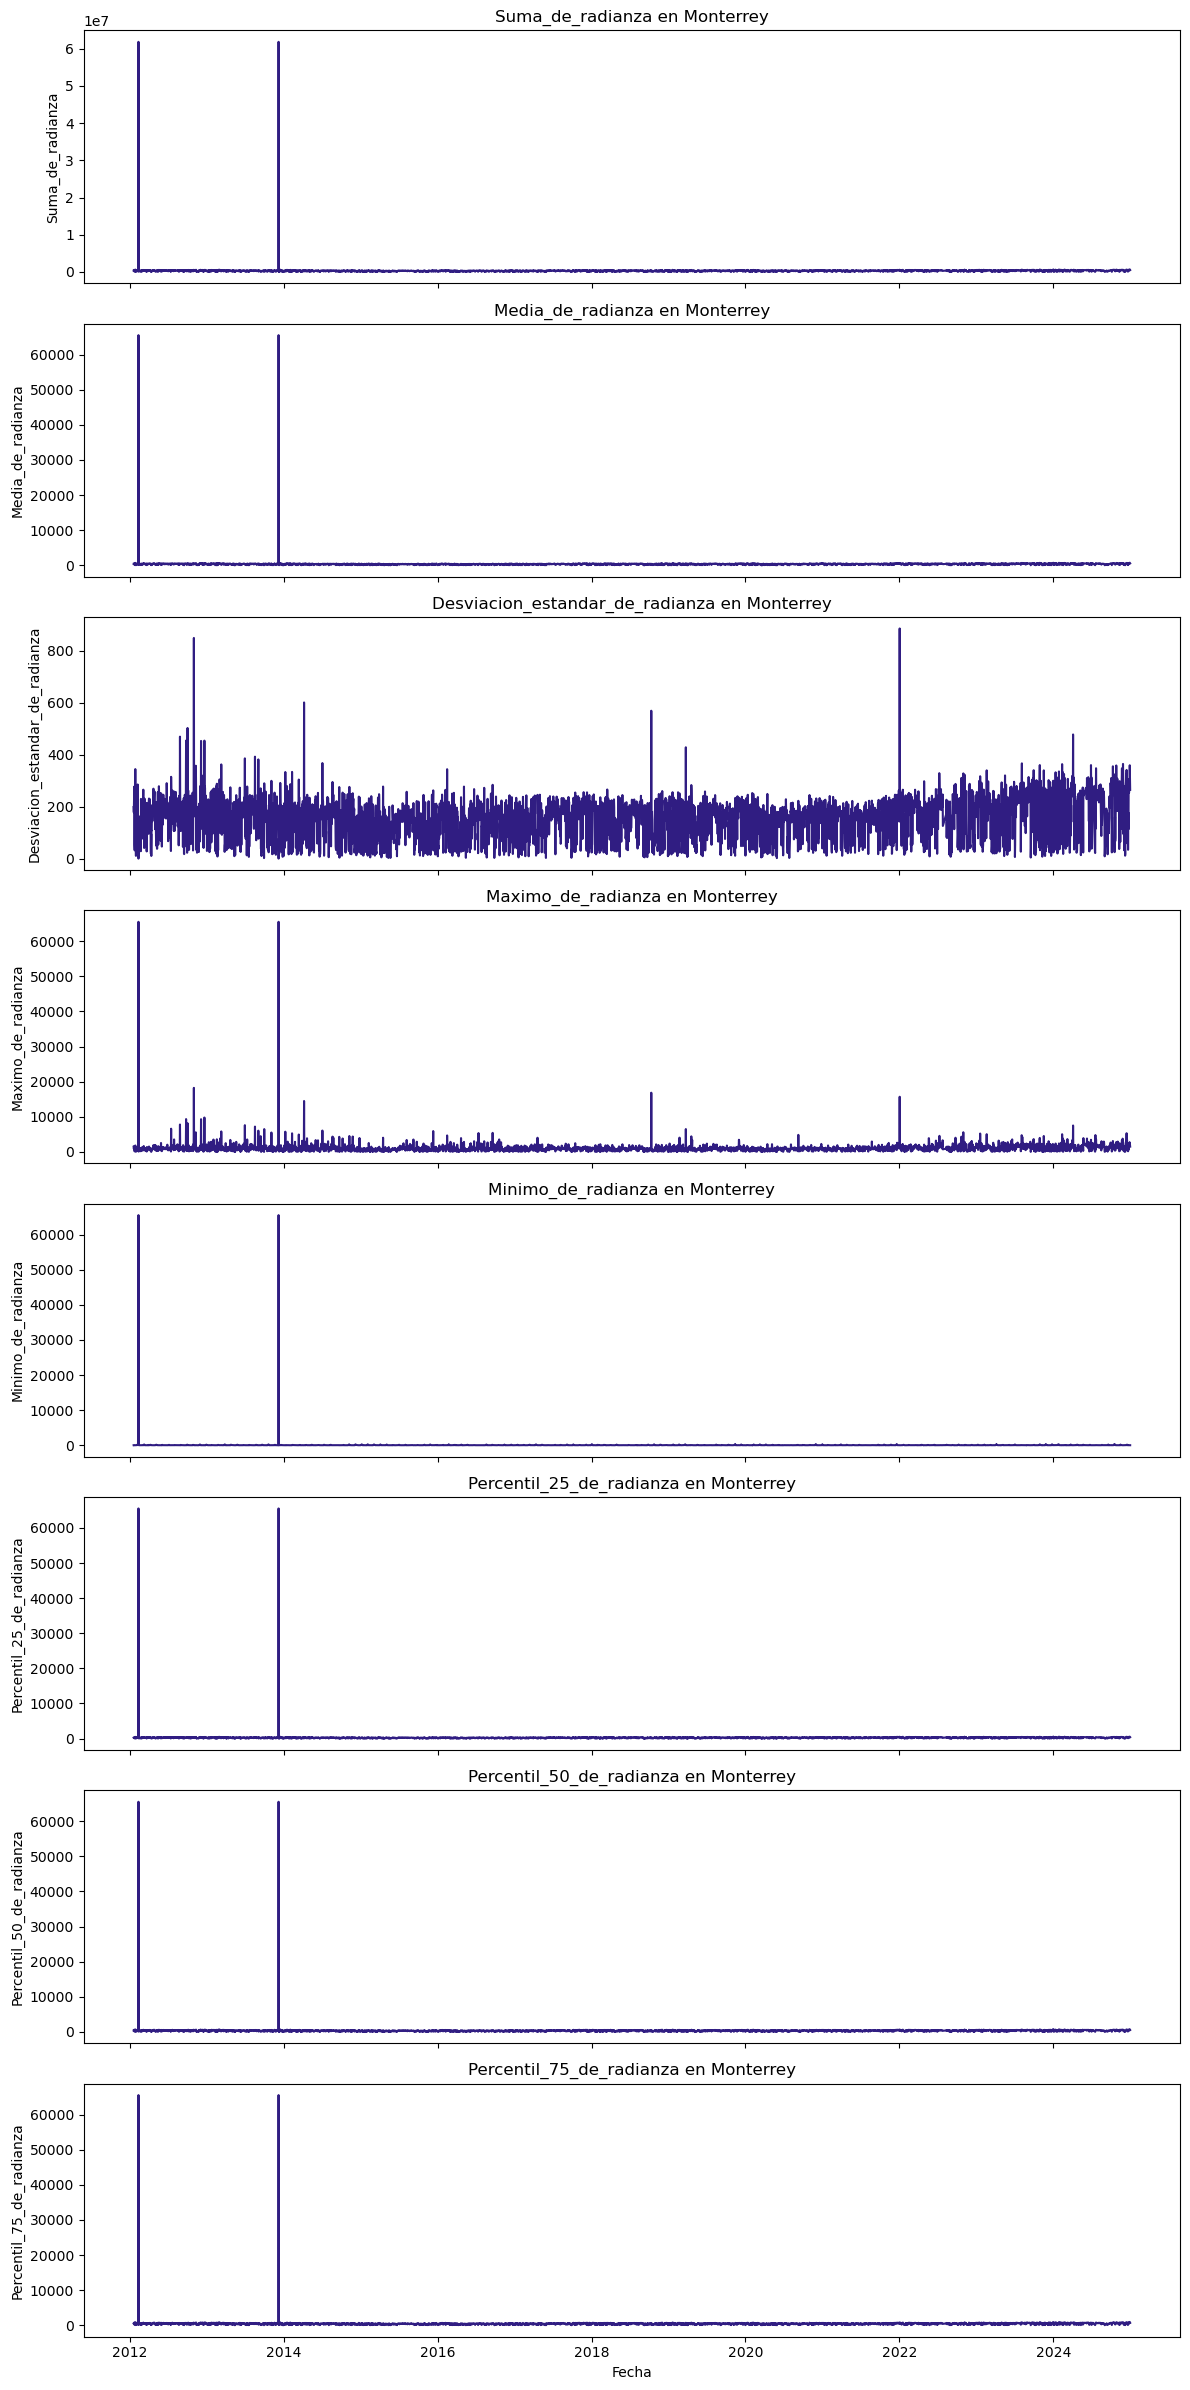

In [4]:
fig, axes = plt.subplots(len(medidas), 1, figsize=(12, 3 * len(medidas)), sharex=True)
if len(medidas) == 1:
    axes = [axes]
for i, medida in enumerate(medidas):
    sns.lineplot(ax=axes[i], data=mont, x="Fecha", y=medida, color="#301D82")
    axes[i].set_title(f"{medida} en Monterrey")
    axes[i].set_xlabel("Fecha")
    axes[i].set_ylabel(medida)
plt.tight_layout()
plt.show()

## Identificando fechas problematicas

In [5]:
fechas = mont.sort_values(by = "Suma_de_radianza", ascending = False).iloc[:2]["Fecha"].values
mont = mont[~mont["Fecha"].isin(fechas)]

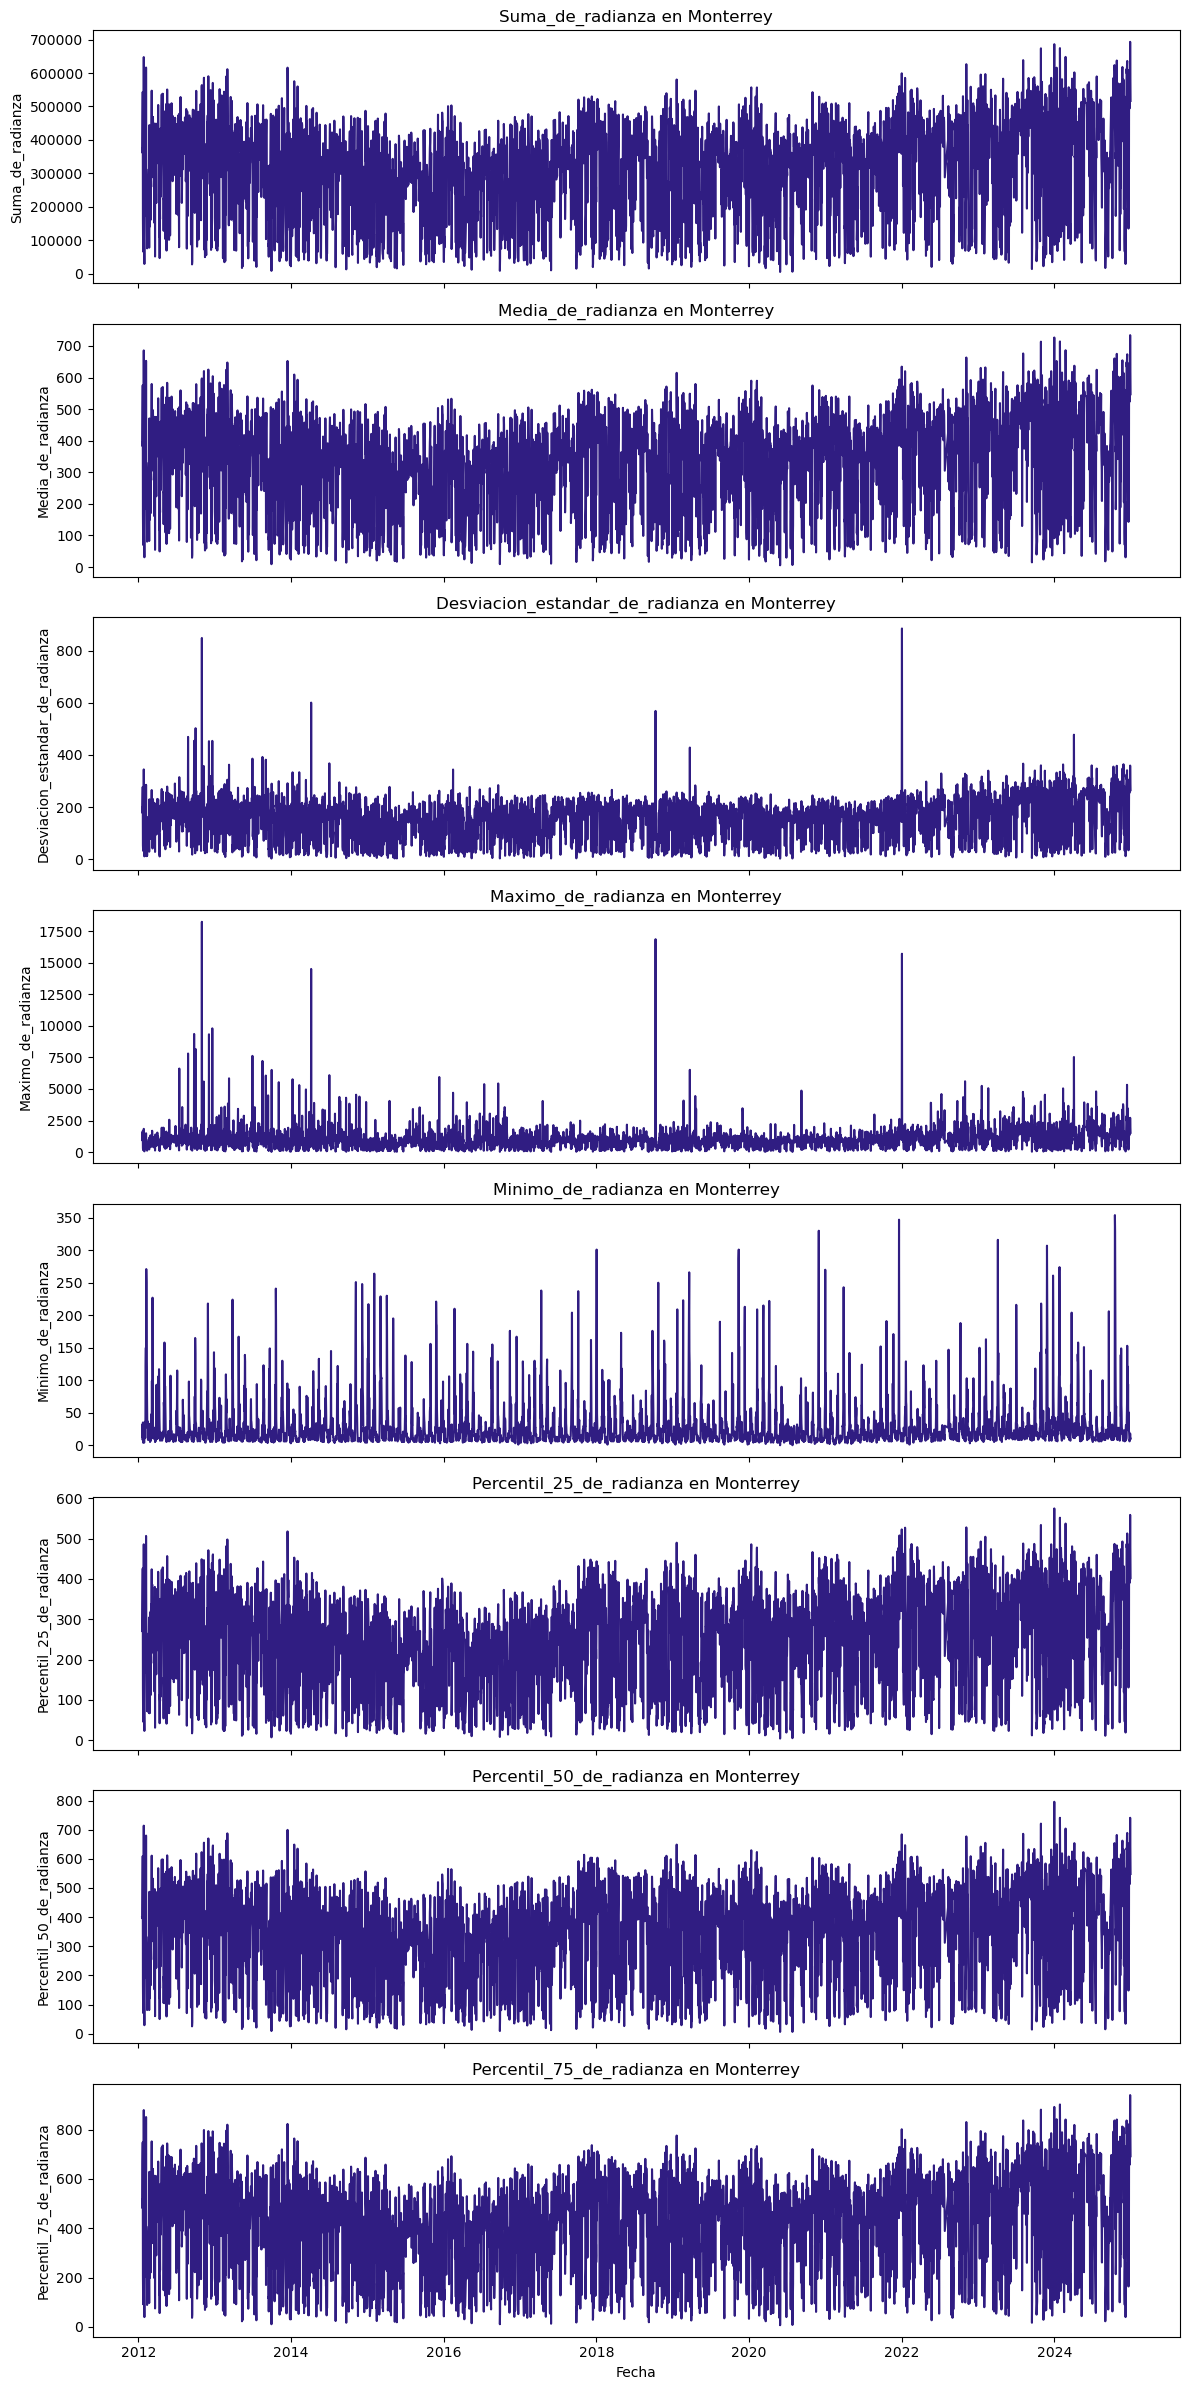

In [6]:
fig, axes = plt.subplots(len(medidas), 1, figsize=(12, 3 * len(medidas)), sharex=True)
if len(medidas) == 1:
    axes = [axes]
for i, medida in enumerate(medidas):
    sns.lineplot(ax=axes[i], data=mont, x="Fecha", y=medida, color="#301D82")
    axes[i].set_title(f"{medida} en Monterrey")
    axes[i].set_xlabel("Fecha")
    axes[i].set_ylabel(medida)
plt.tight_layout()
plt.show()

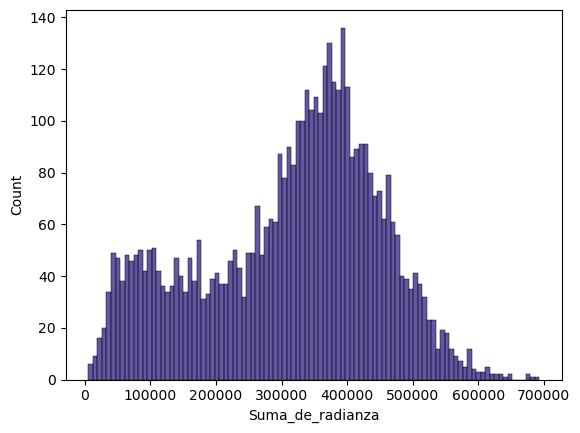

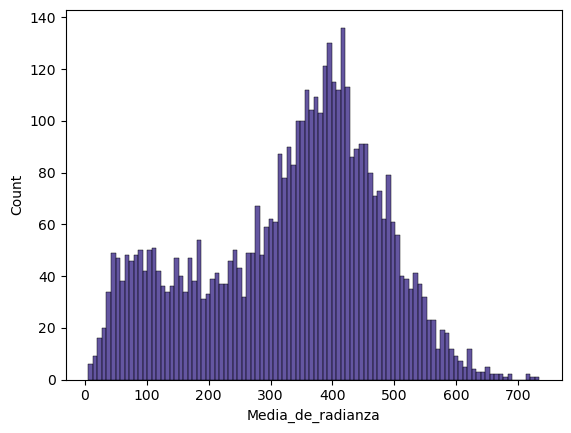

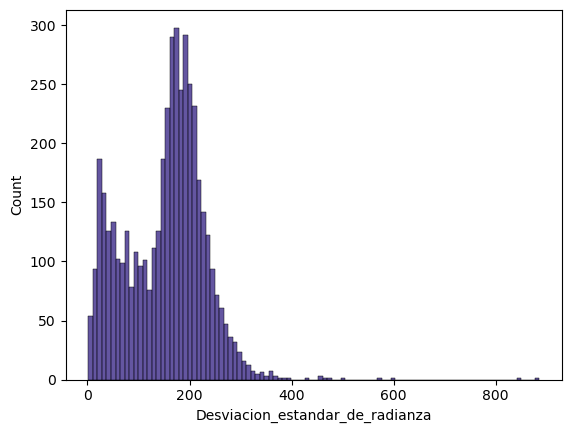

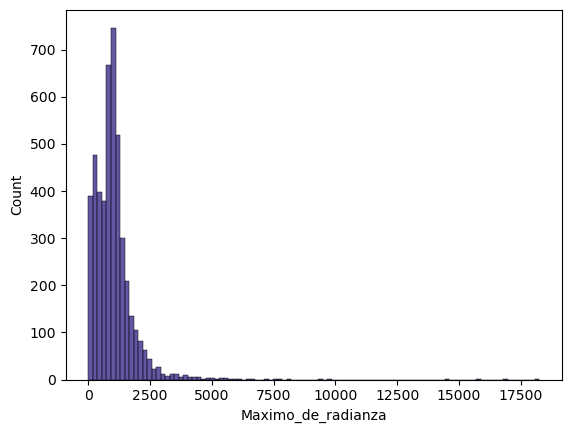

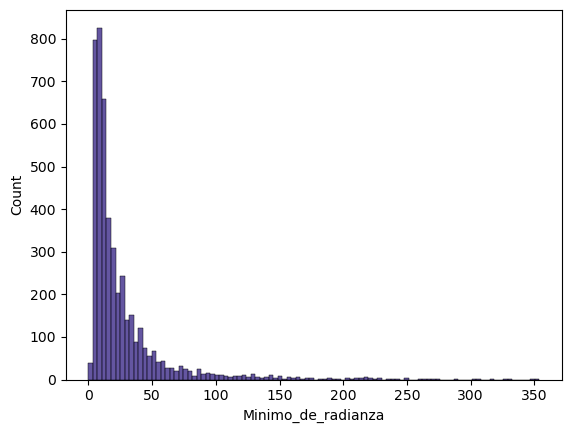

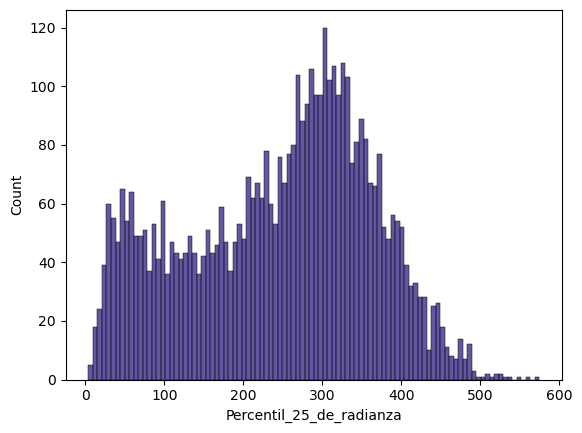

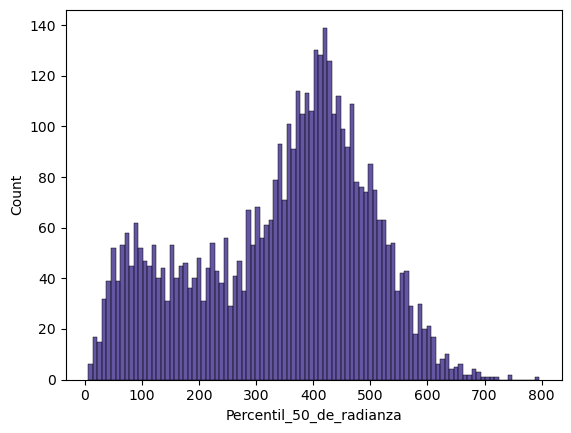

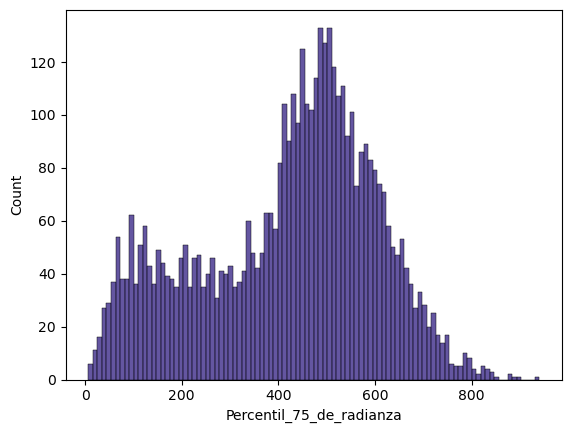

In [7]:
for medida in medidas:
    sns.histplot(data=mont, x=medida, bins=100, color="#301D82")
    plt.show()

# Aplicando STL

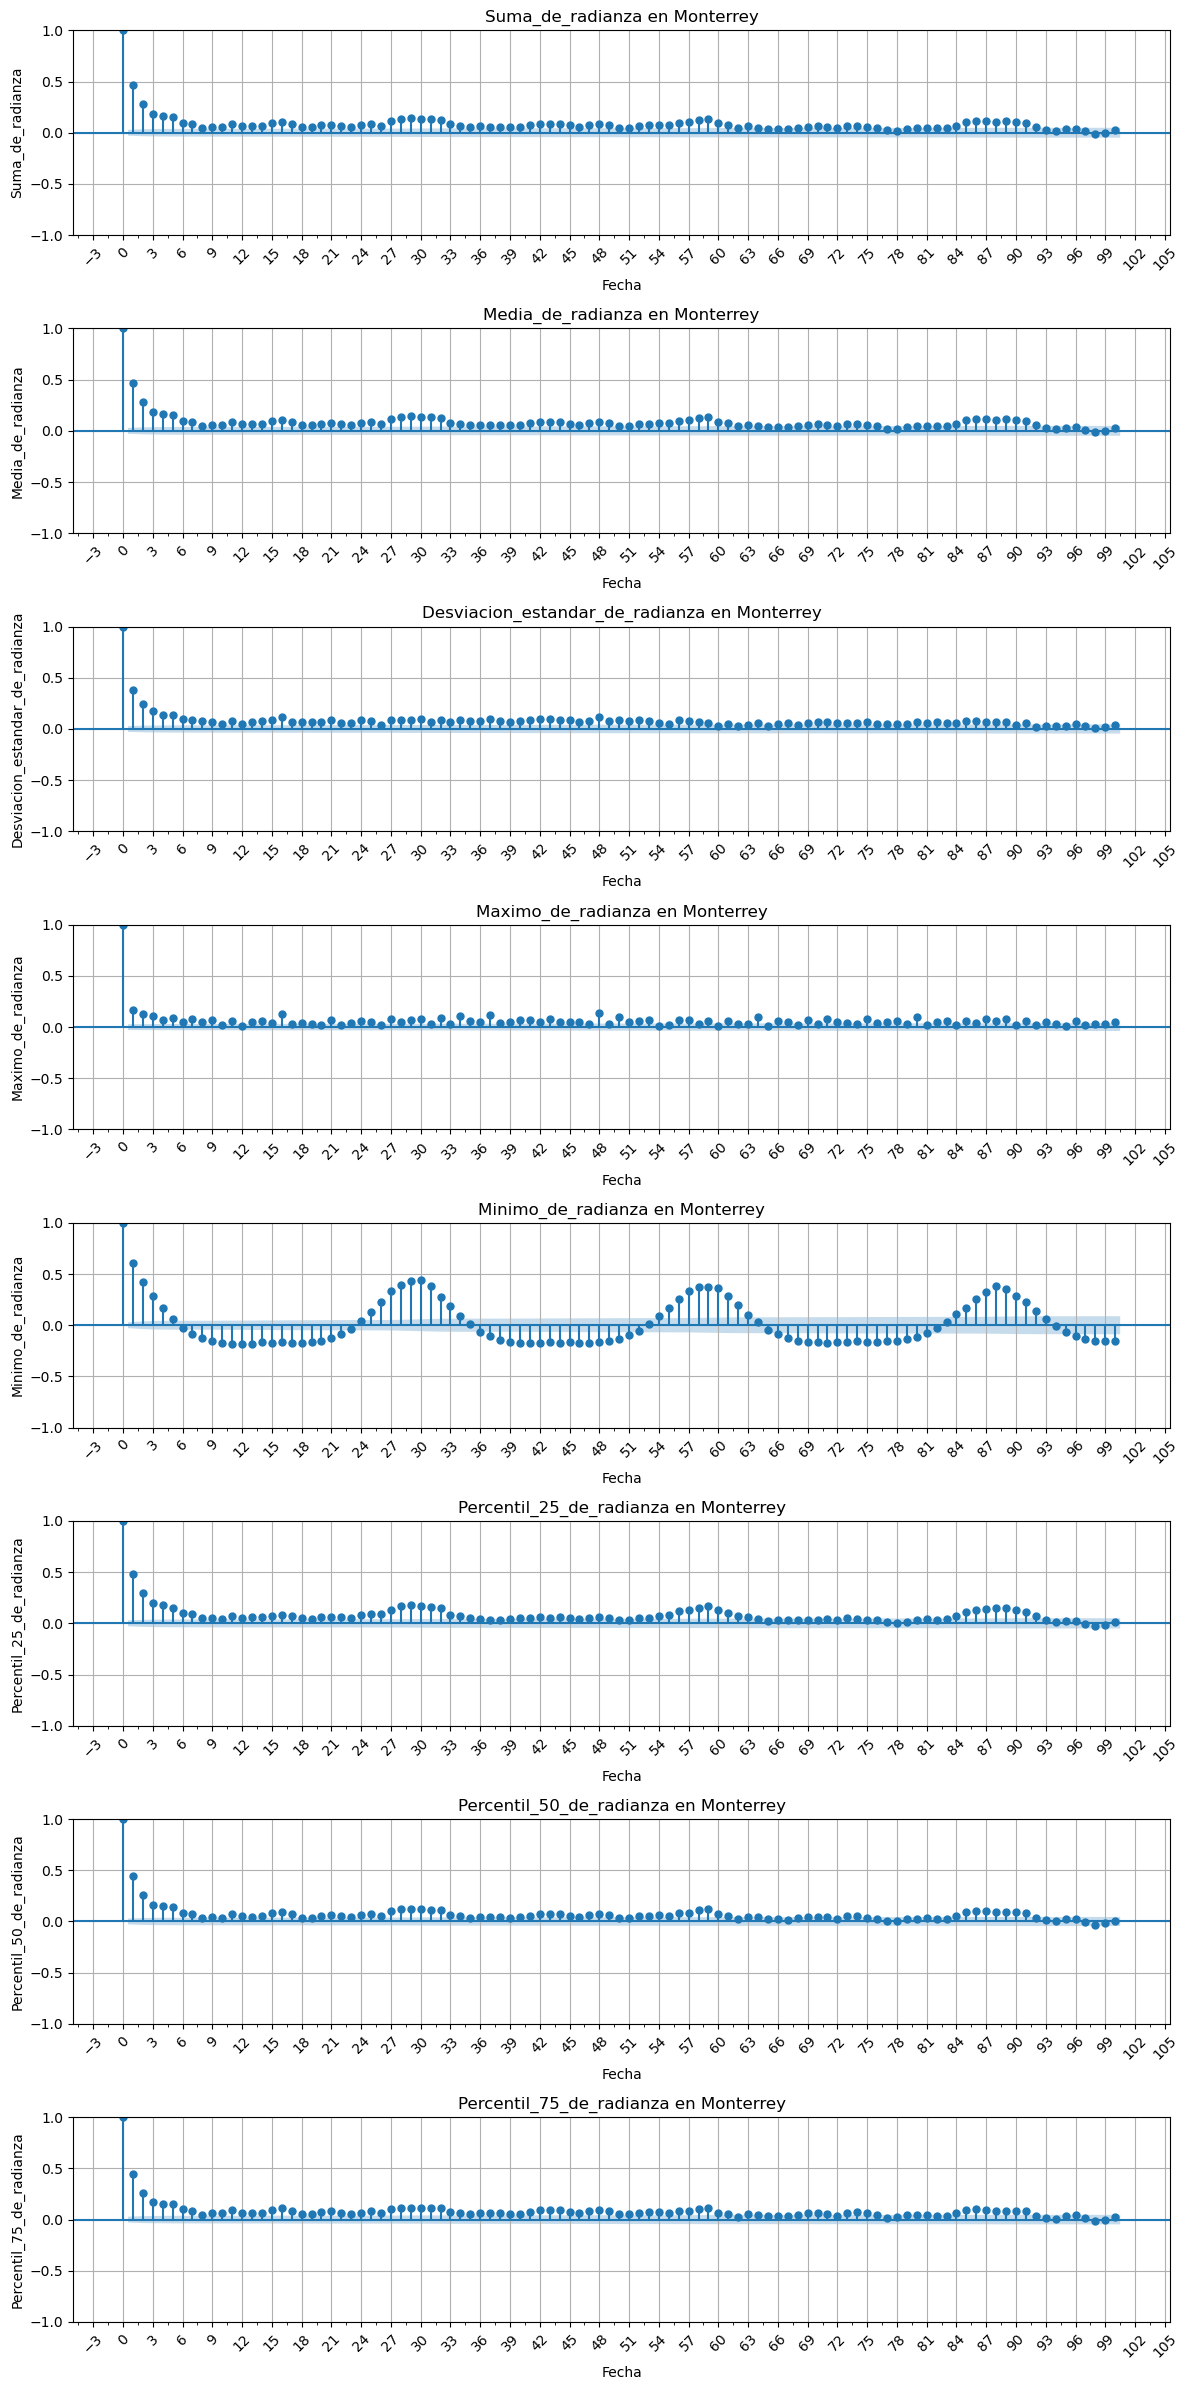

In [8]:
fig, axes = plt.subplots(len(medidas), 1, figsize=(12, 3 * len(medidas)), sharex=False)  # Cambia sharex a False
if len(medidas) == 1:
    axes = [axes]
for i, medida in enumerate(medidas):
    plot_acf(mont[medida], ax=axes[i], lags=100)
    axes[i].set_title(f"{medida} en Monterrey")
    axes[i].set_xlabel("Fecha")
    axes[i].set_ylabel(medida)
    # Forzar más valores en el eje x
    axes[i].xaxis.set_major_locator(mticker.MaxNLocator(nbins=40, integer=True))
    axes[i].xaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    axes[i].tick_params(axis='x', which='major', labelrotation=45)
    axes[i].grid(True)
plt.tight_layout()
plt.show()


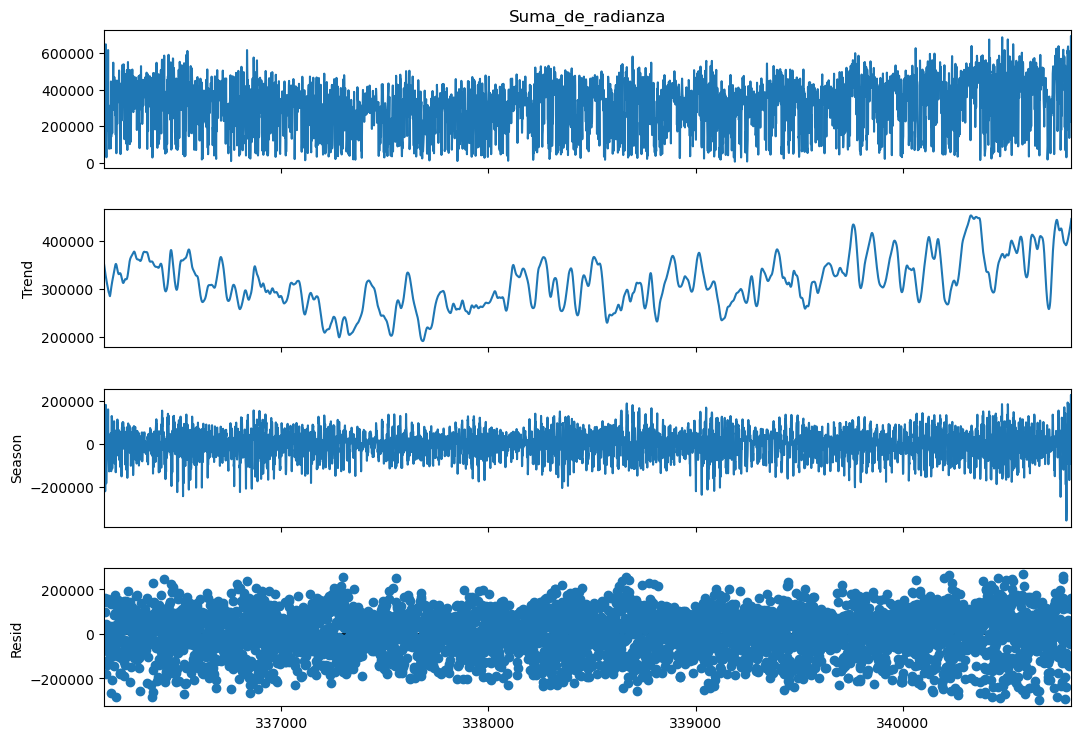

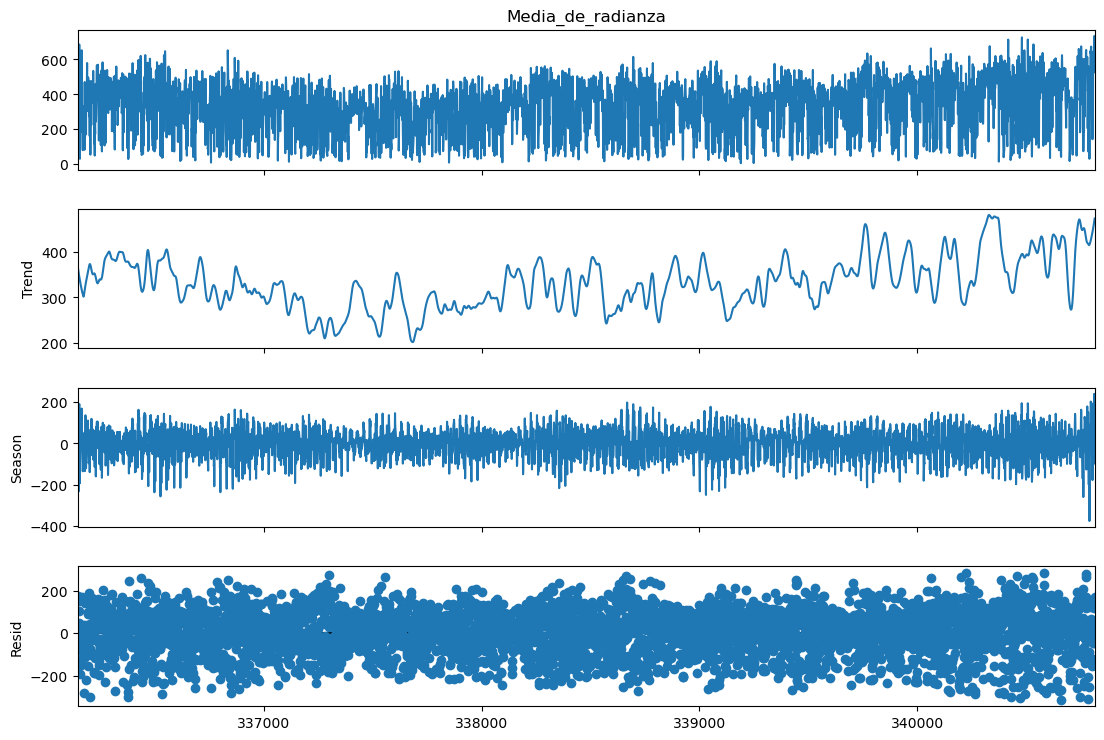

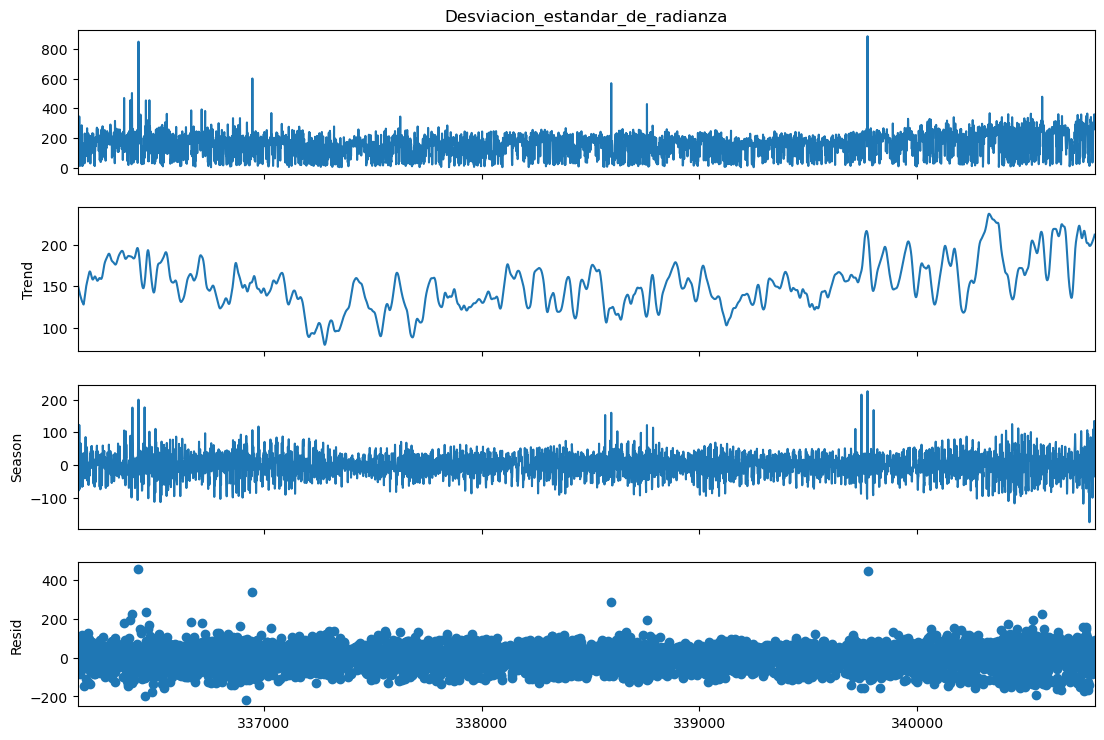

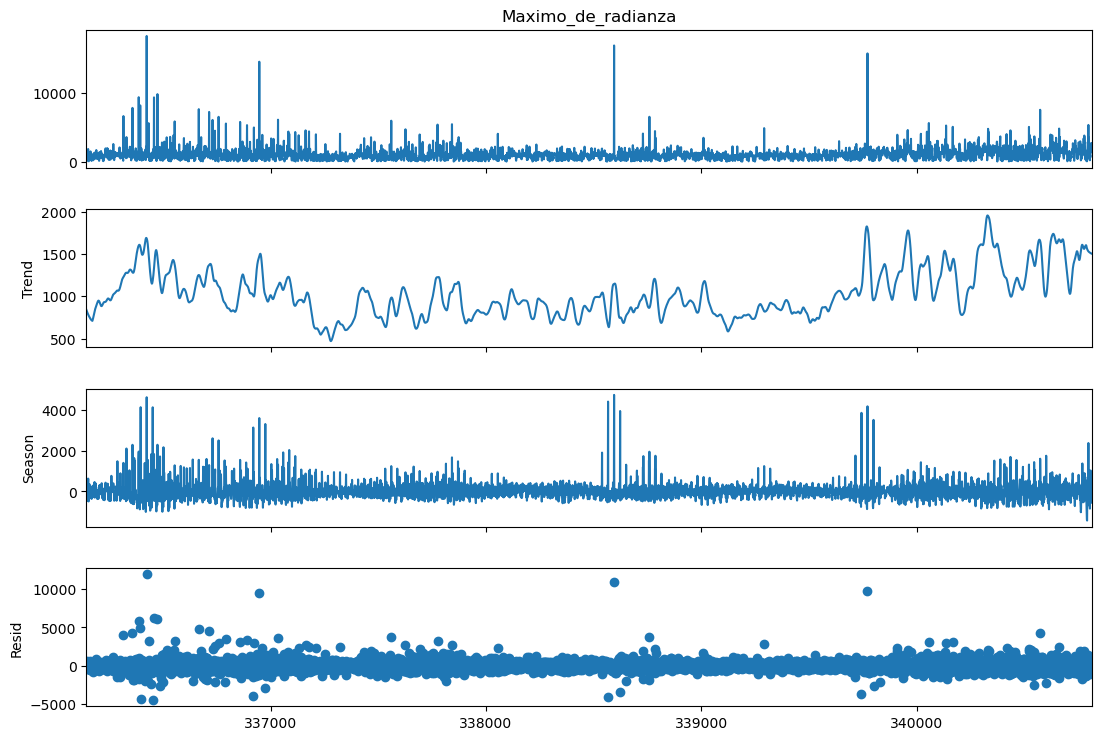

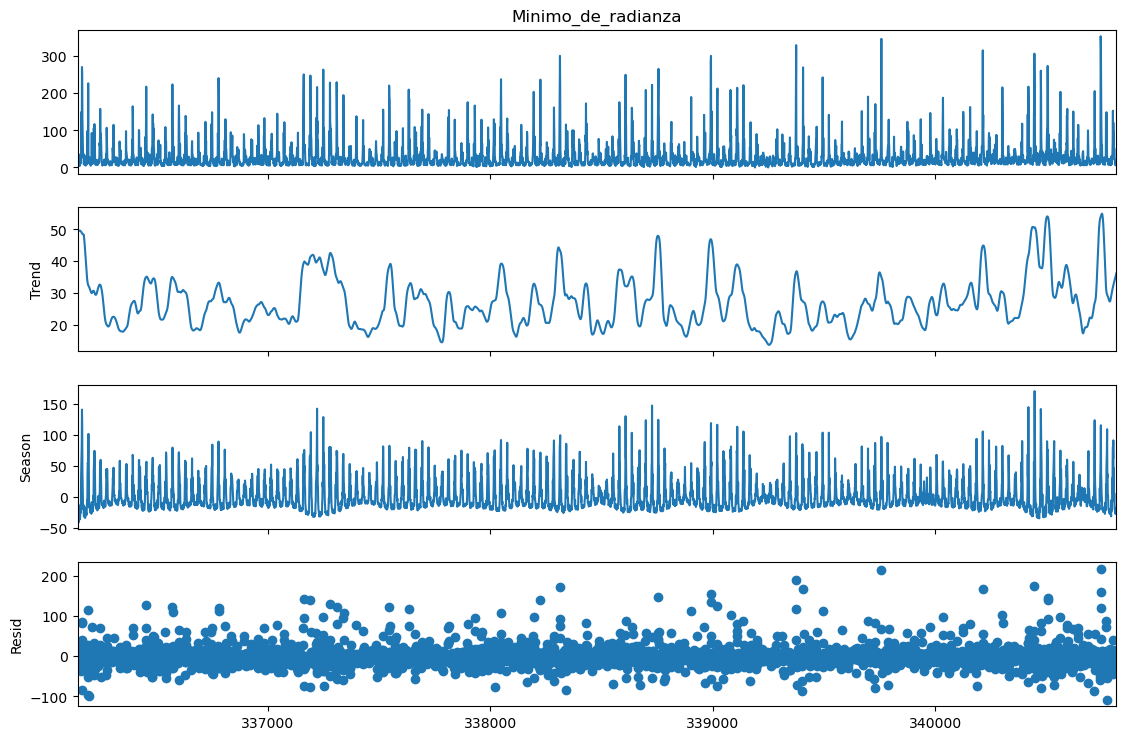

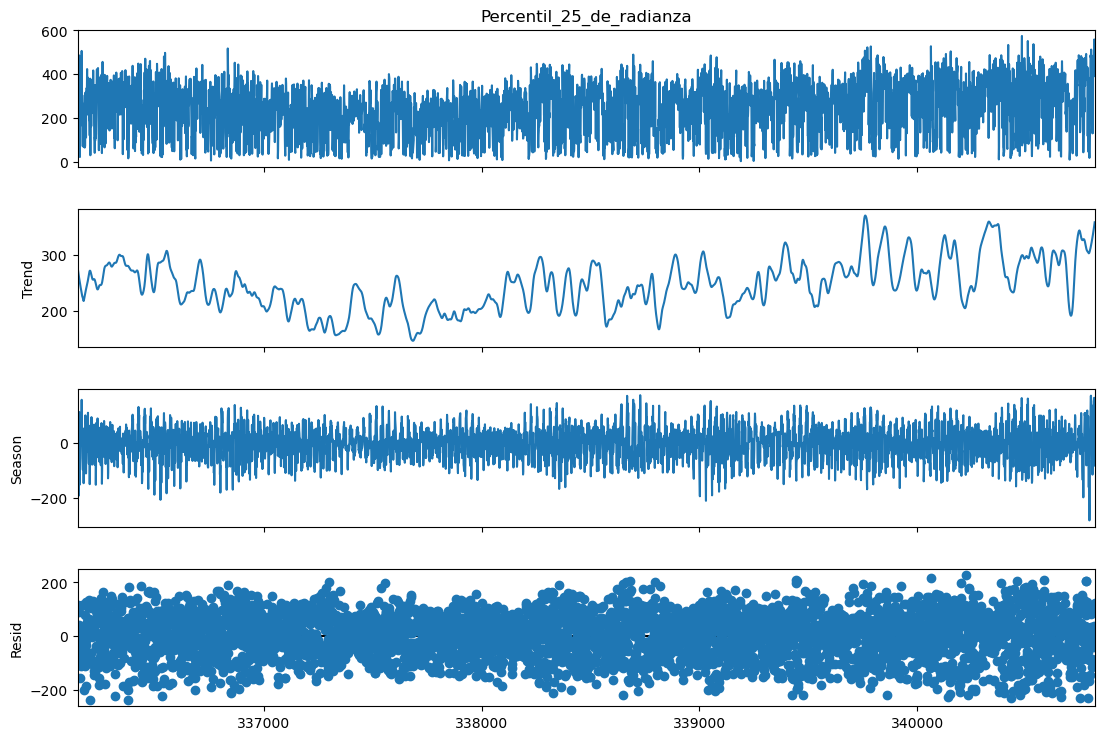

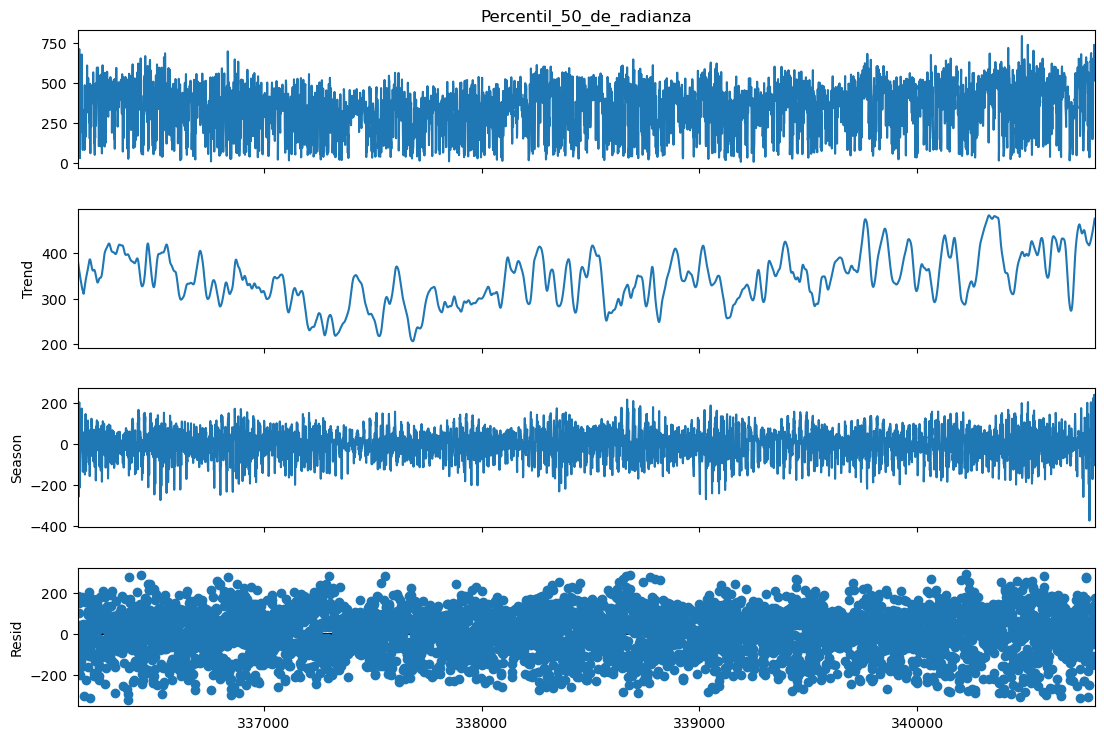

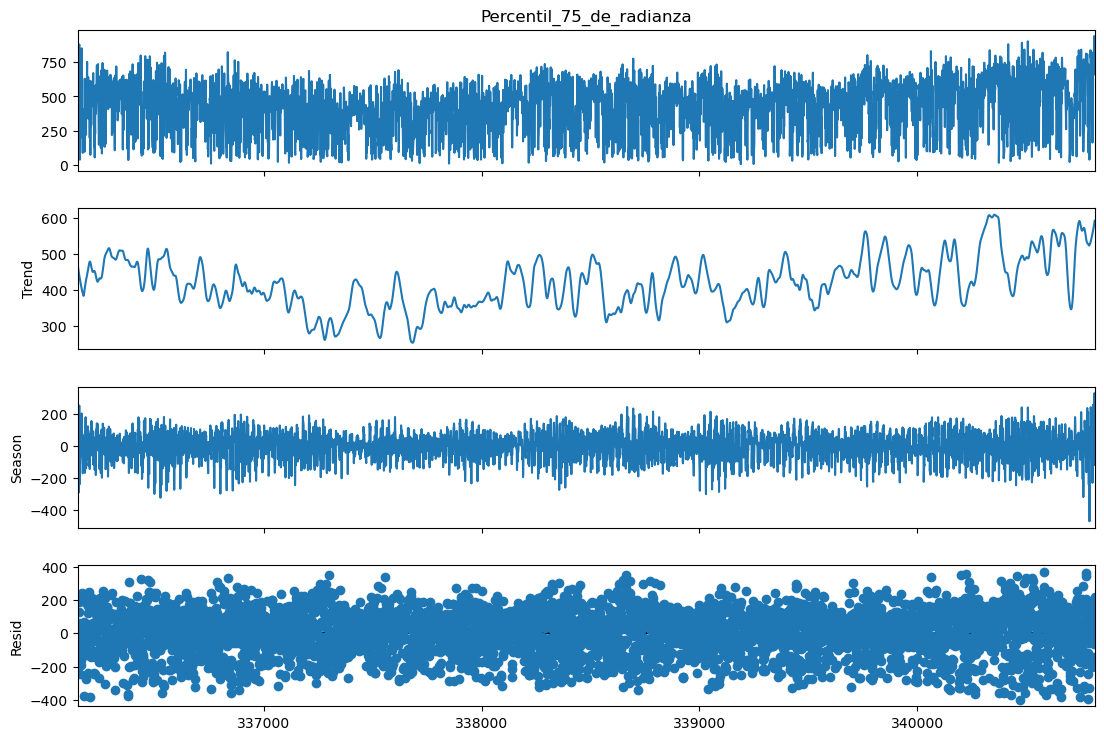

In [9]:
from statsmodels.graphics.tsaplots import plot_acf

mont_trend = {
    "fecha": mont["Fecha"],
    "municipio": mont["Municipio"],
    "total_pixeles": mont["Cantidad_de_pixeles"],
}

for i, medida in enumerate(medidas):
    
    stl = STL(mont[medida], period=28)
    res = stl.fit()
    # Extraer componente de trend
    trend = res.trend
    mont_trend[medida] = trend

    fig = res.plot()
    fig.set_size_inches(12, 8)
    plt.show()

mont_trend = pd.DataFrame(mont_trend)
mont_trend.to_csv("../data_municipios/mont_trend.csv", index=False)

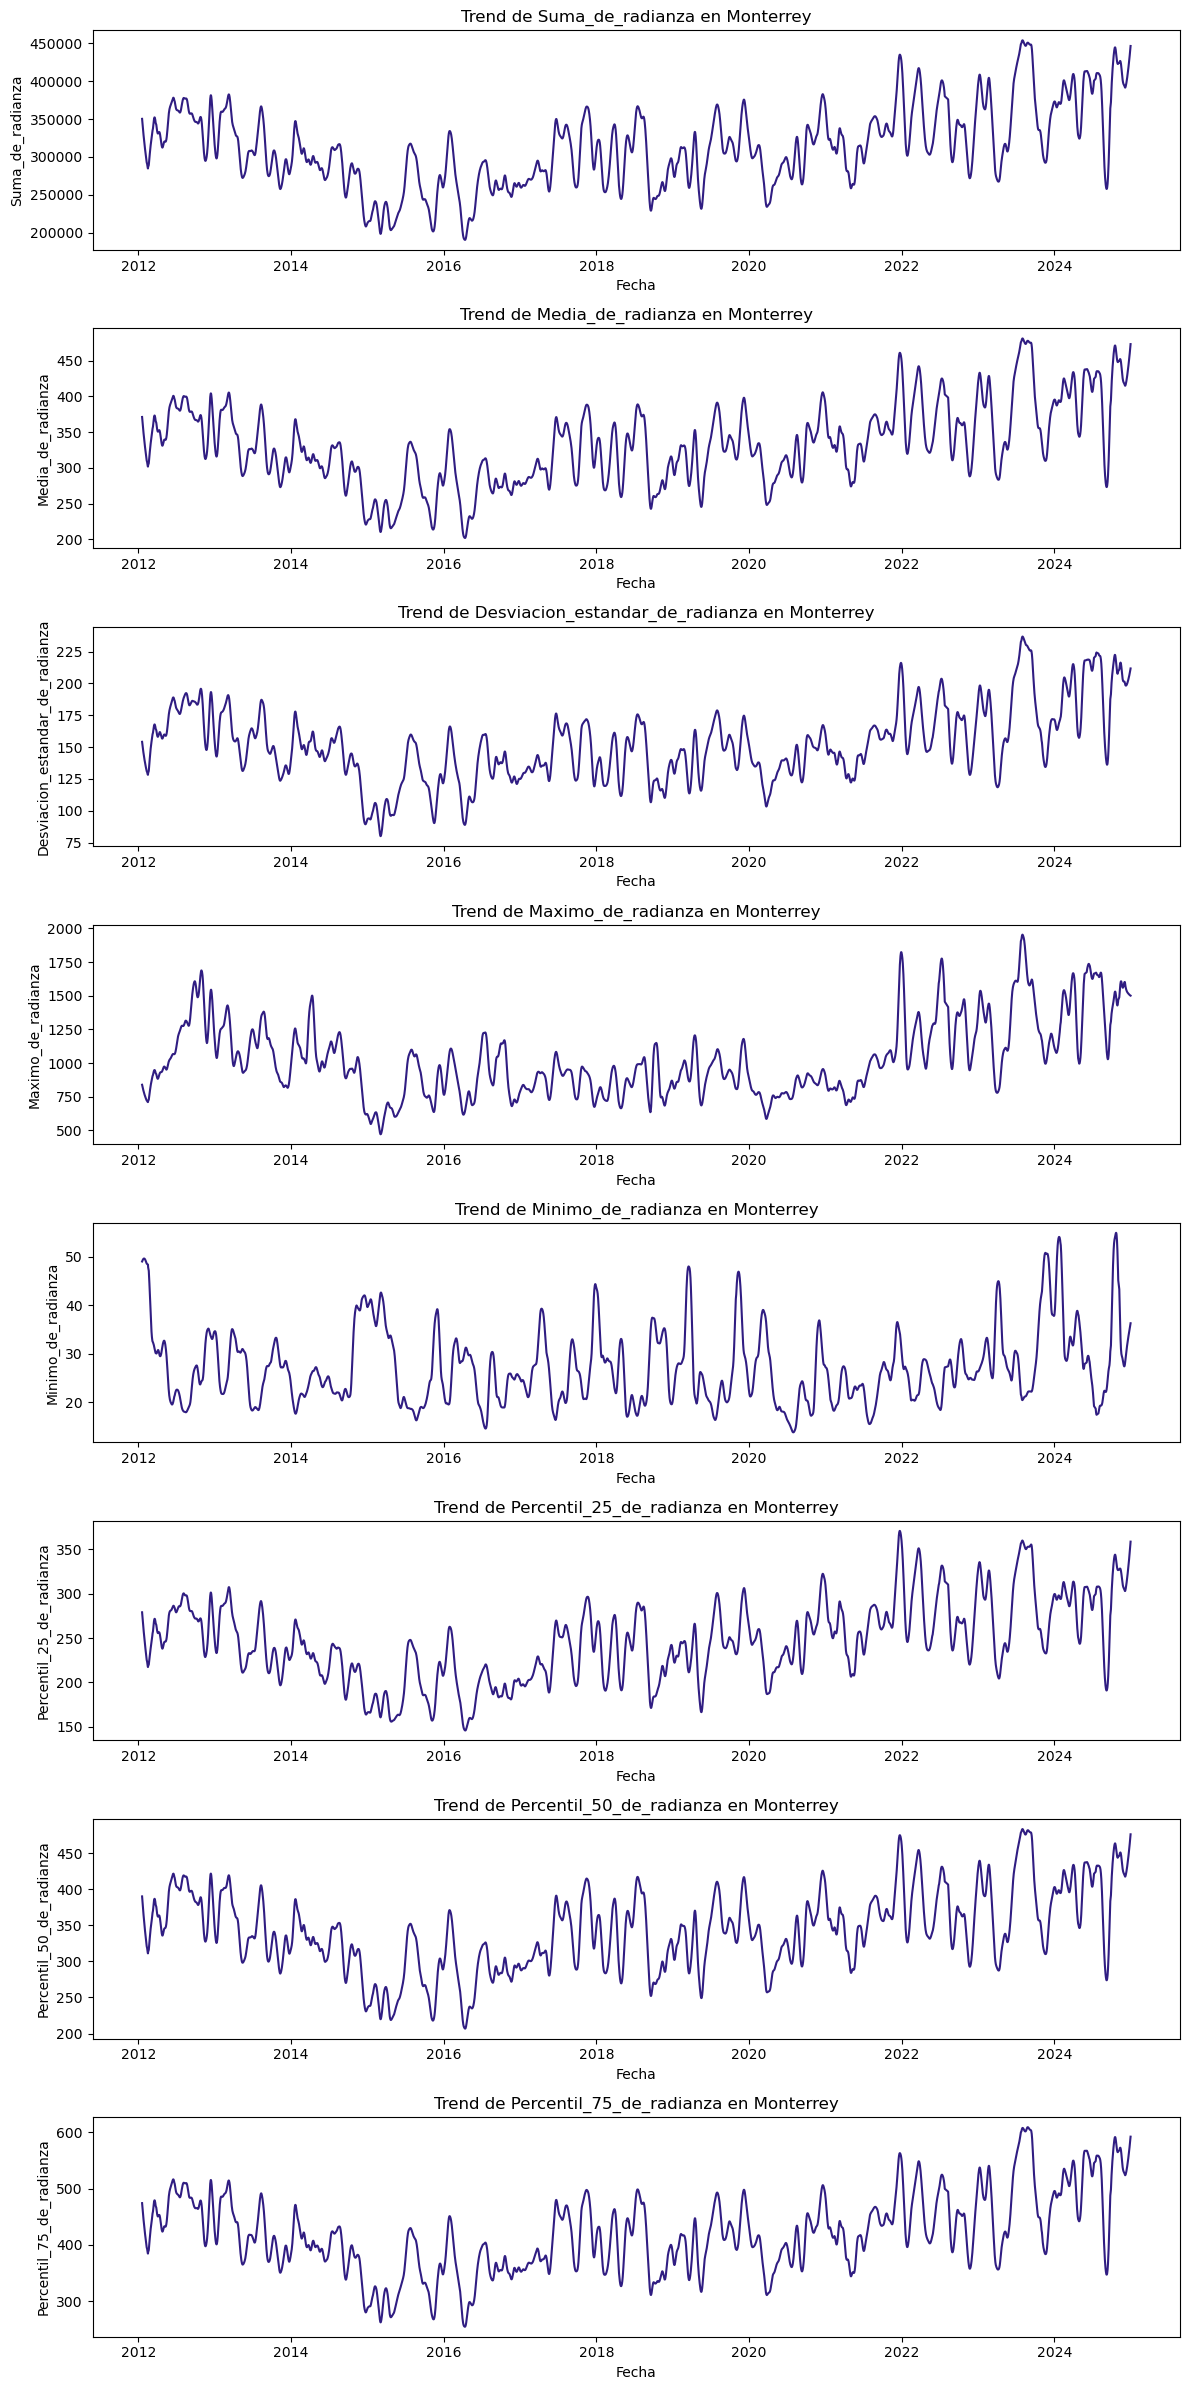

In [10]:
fig, axes = plt.subplots(len(medidas), 1, figsize=(12, 3 * len(medidas)), sharex=False)  # Cambia sharex a False
for i, medida in enumerate(medidas):
    sns.lineplot(data=mont_trend, x="fecha", y=medida, color="#301D82", ax=axes[i])
    axes[i].set_title(f"Trend de {medida} en Monterrey")
    axes[i].set_xlabel("Fecha")
    axes[i].set_ylabel(medida)
plt.tight_layout()
plt.show()


# Preprocesamiento de PIB municipal monterrey

In [11]:
pib_myt = pd.read_csv("../data_municipios/serie_PIB_mty.csv")
pib_myt["fecha"] = pd.to_datetime(pib_myt["fecha"])
pib_myt.sort_values(by = "fecha", ascending = True, inplace = True)
pib_myt.head(15)

fecha  municipio entidad_federativa  porc_pob         pibe  \
0  2004-03-31  Monterrey                 NL  0.197598    849,841.6   
1  2004-06-30  Monterrey                 NL  0.197598    858,740.9   
2  2004-09-30  Monterrey                 NL  0.197598    865,436.6   
3  2004-12-31  Monterrey                 NL  0.197598    873,446.1   
4  2005-03-31  Monterrey                 NL  0.197598    885,438.8   
5  2005-06-30  Monterrey                 NL  0.197598    878,166.1   
6  2005-09-30  Monterrey                 NL  0.197598    890,018.0   
7  2005-12-31  Monterrey                 NL  0.197598    891,694.9   
8  2006-03-31  Monterrey                 NL  0.197598    946,837.9   
9  2006-06-30  Monterrey                 NL  0.197598    940,461.6   
10 2006-09-30  Monterrey                 NL  0.197598    963,015.5   
11 2006-12-31  Monterrey                 NL  0.197598    965,421.3   
12 2007-03-31  Monterrey                 NL  0.197598  1,004,636.5   
13 2007-06-30  Monterrey                 NL  0.197598    977,497.6   
14 2007-09-30  Monterrey                 NL  0.197598    986,956.9   

        pib_mun  
0   167926.9664  
1   169685.4517  
2   171008.5077  
3   172591.1805  
4   174960.9074  
5   173523.8420  
6   175865.7441  
7   176197.1040  
8   187093.2507  
9   185833.2941  
10  190289.9133  
11  190765.2963  
12  198514.1377  
13  193151.5514  
14  195020.6828

<Axes: xlabel='fecha', ylabel='pib_mun'>

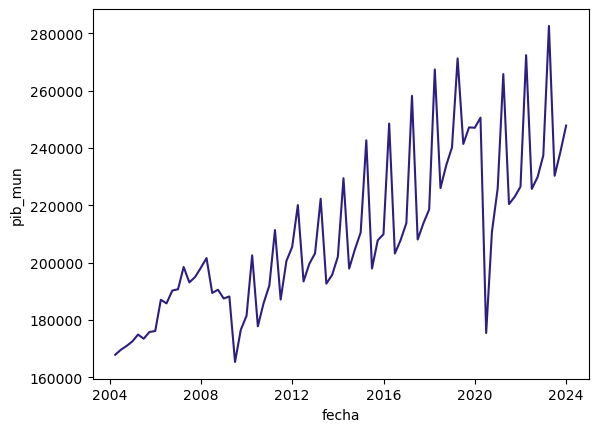

In [12]:
sns.lineplot(data=pib_myt, x="fecha", y="pib_mun", color="#301D82")

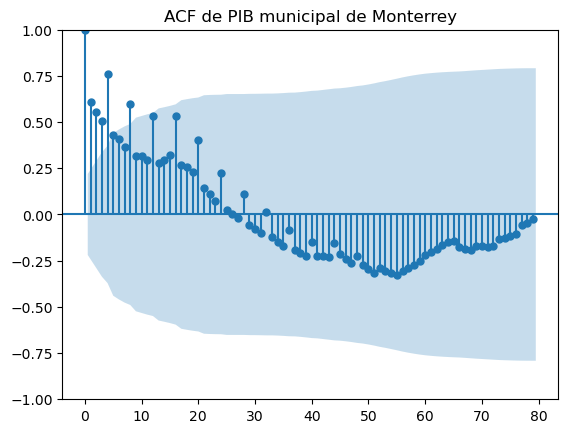

In [13]:
plot_acf(pib_myt["pib_mun"], lags=79)
plt.title("ACF de PIB municipal de Monterrey")
plt.show()

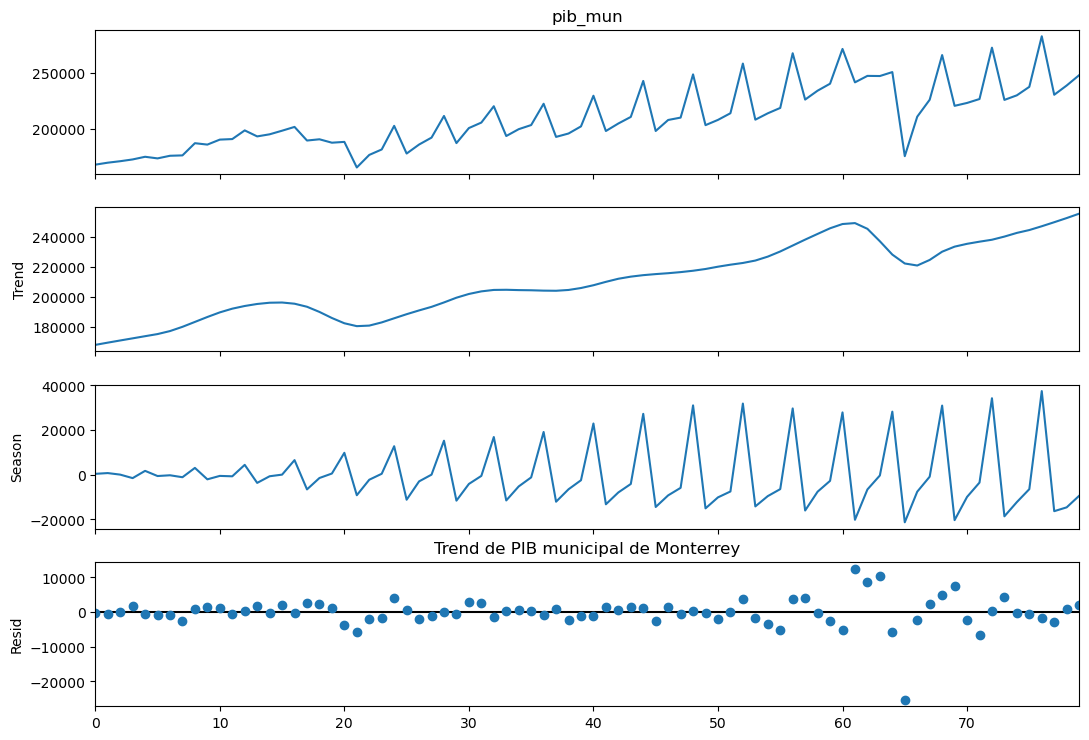

In [14]:
pib_trend = {
    "fecha": pib_myt["fecha"],
    "municipio": pib_myt["municipio"],
    "pib_mun": pib_myt["pib_mun"],
}

stl = STL(pib_myt["pib_mun"], period=4)
res = stl.fit()
trend = res.trend
pib_trend["pib_mun"] = trend
fig = res.plot()
fig.set_size_inches(12, 8)
plt.title("Trend de PIB municipal de Monterrey")
plt.show()

pib_trend = pd.DataFrame(pib_trend)
pib_trend.to_csv("../data_municipios/pib_trend_mty.csv", index=False)

# Luz diaria -> Luz trimestral

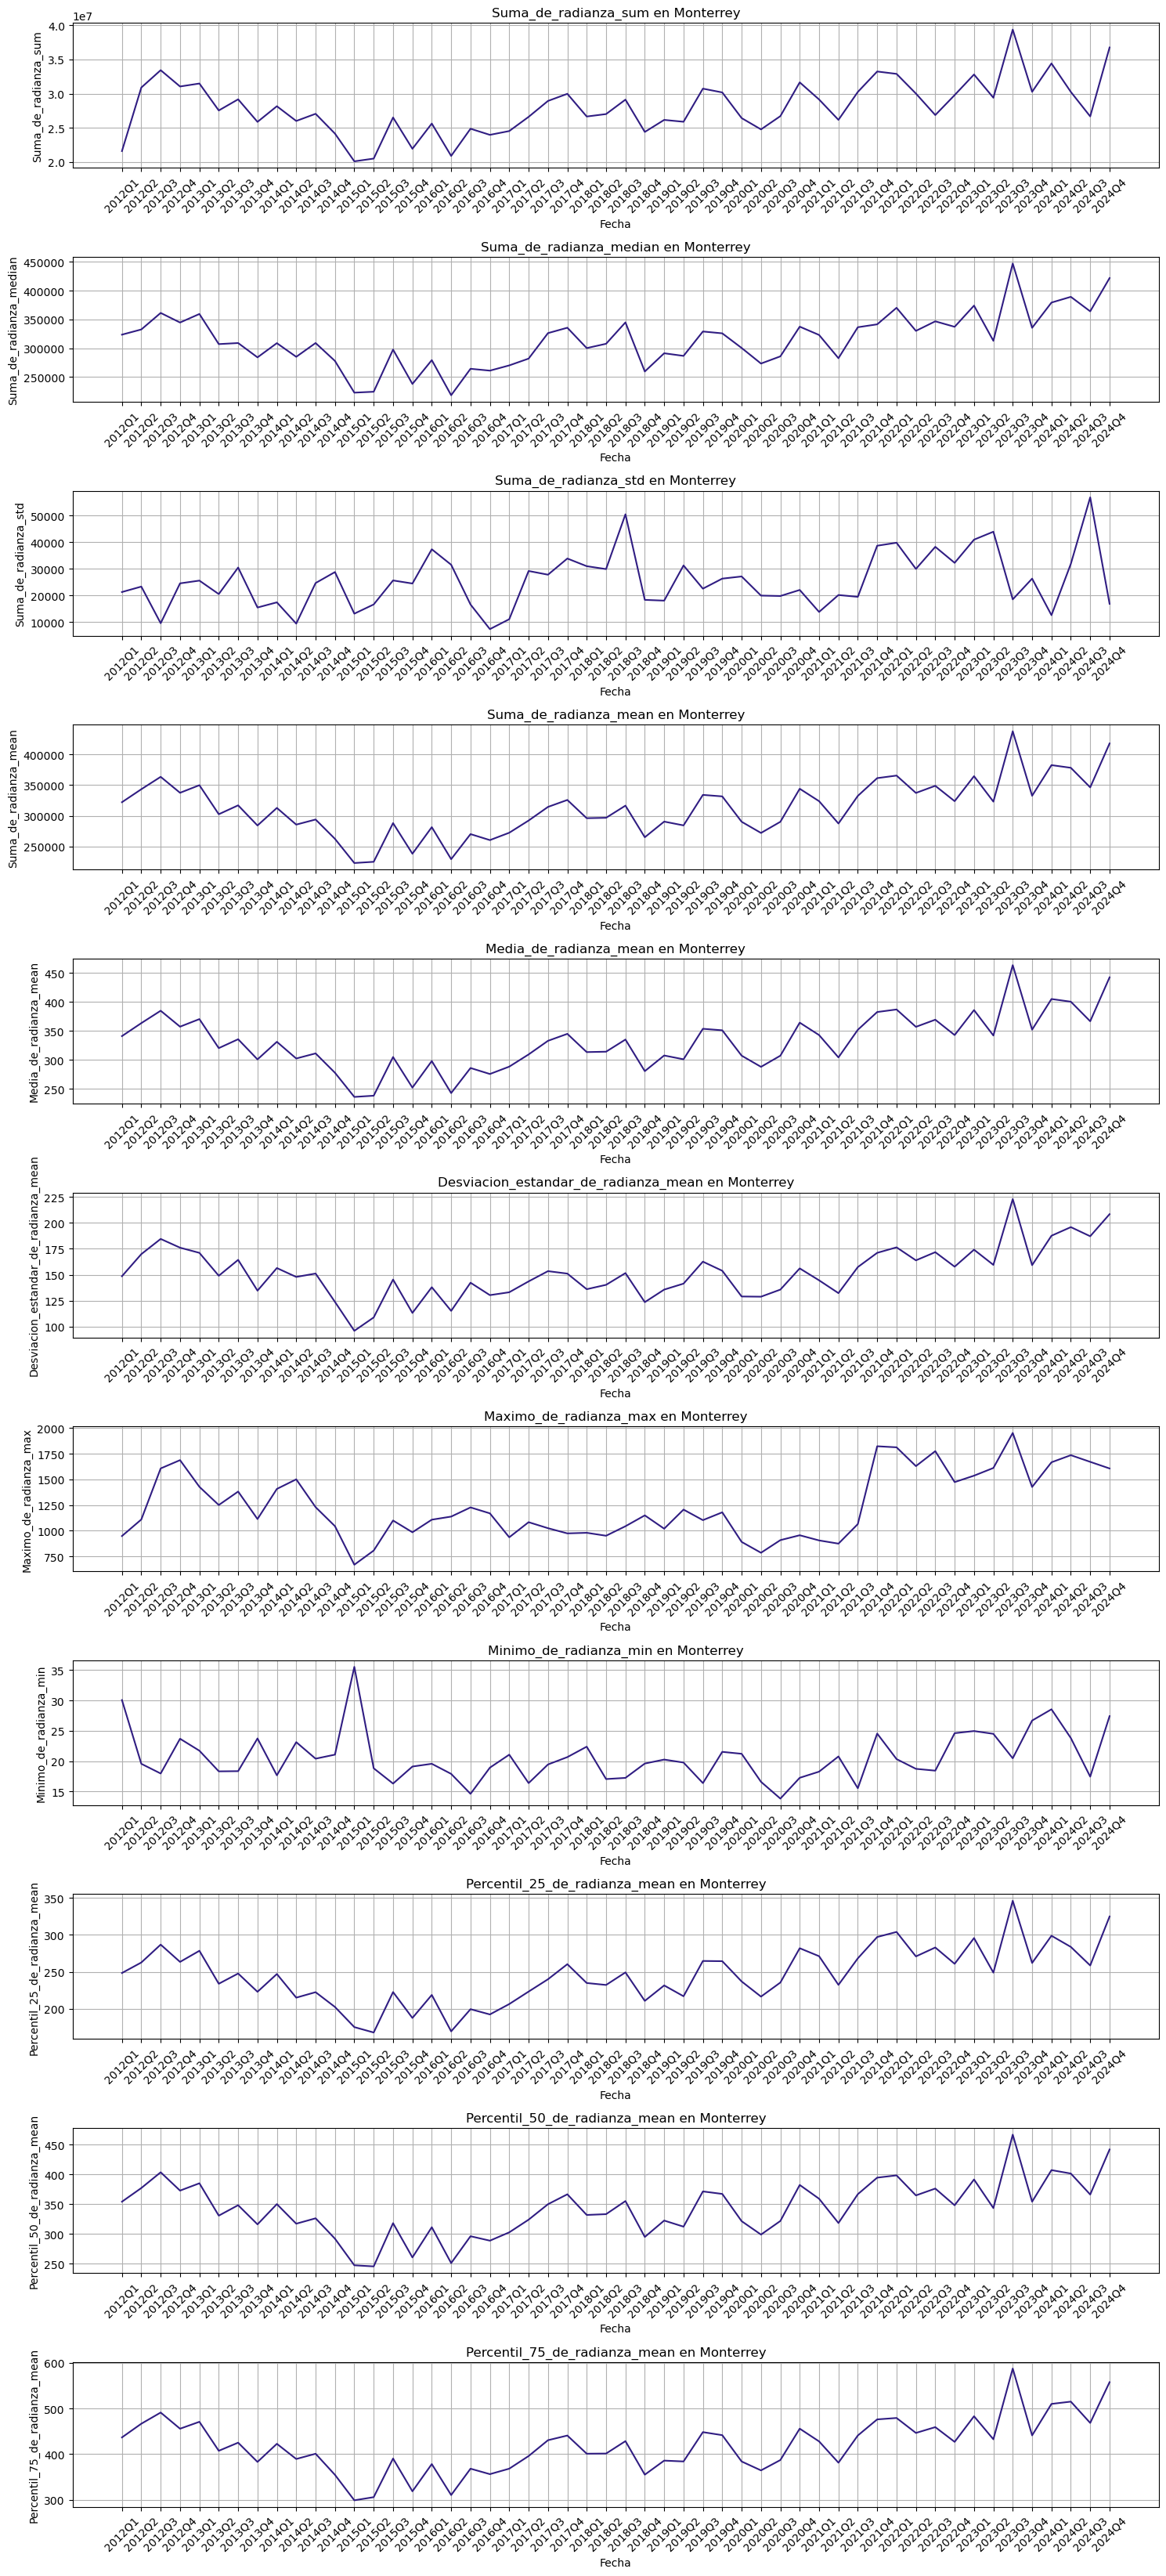

In [65]:
mont_trend["quarter"] = mont_trend["fecha"].dt.to_period("Q")
mont_trend_quarter = mont_trend.groupby("quarter").agg(
    {
        "total_pixeles": "median",
        "Suma_de_radianza": ["sum", "median", "std", "mean"],
        "Media_de_radianza": "mean",
        "Desviacion_estandar_de_radianza": "mean",
        "Maximo_de_radianza": "max",
        "Minimo_de_radianza": "min",
        "Percentil_25_de_radianza": "mean",
        "Percentil_50_de_radianza": "mean",
        "Percentil_75_de_radianza": "mean",
    }
).reset_index()

mont_trend_quarter_columns = ["_".join(col)  for col in mont_trend_quarter.columns.values]
mont_trend_quarter_columns[mont_trend_quarter_columns.index("quarter_")] = "quarter"
mont_trend_quarter.columns = mont_trend_quarter_columns

mont_trend_quarter["quarter"] = mont_trend_quarter["quarter"].astype(str)

medidas = mont_trend_quarter.columns[2:]
fig, axes = plt.subplots(len(medidas), 1, figsize=(15, 3 * len(medidas)), sharex=False)

for i, medida in enumerate(medidas):
    sns.lineplot(data=mont_trend_quarter, x="quarter", y=medida, color="#301D82", ax=axes[i], )
    axes[i].set_title(f"{medida} en Monterrey")
    axes[i].set_xlabel("Fecha")
    axes[i].set_ylabel(medida)
    axes[i].tick_params(axis='x', which='major', labelrotation=45)
    axes[i].grid(True)
plt.tight_layout()
plt.show()

# Inner join PIB y Luz trimestral

In [74]:
pib_trend["quarter"] = pib_trend["fecha"].dt.to_period("Q")
pib_trend["quarter"] = pib_trend["quarter"].astype(str)
merged_quarter = pd.merge(mont_trend_quarter, pib_trend, on="quarter", how="inner", suffixes=("_luz", "_pib"))
merged_quarter.to_csv("../data_municipios/serie_trimestral_monterrey.csv", index=False)